<a href="https://colab.research.google.com/github/JessicaWoods03/Comp411Assignments/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HomeWork 4
Jessica Woods

1. Summarize the basic idea of logistic regression support vector machines (SVM), and decision tree

logistic regression model, we have to keep in mind that it only works for binary classification tasks. You are kind of working with overfitting and regularizations. But the objective is to maximize the margins in the hyper planes. Decision Trees help with catagorical variables and real numbers that are features. We are iterating threw Decision trees in java, this helps clean up unwanted data.

2. Read the section of Random Forest and summarize the major steps.
  There is four steps-

  1. Draw a random bootstrap sample of size
  2. Grow a decision tree from the bootstrap sample.
  3. Repeat the steps 1-2k
  4. Aggregate the prediction by each tree to assign the class by lable by maoirity vote

3. Red the section of K-nearest neighbors. Is it a parametric or nonparametric model? WHy is that?
parametric models- we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore.
nonparametric models- can't be characterized by a fixed set of parameters, and the number of parameters grows with the training data.
That is because one requires memory of the training dataset-

5. Explain what are the bais-variance trade off and regularization

bias–variance tradeoff- is the property of a set of predictive models whereby models with a lower bias in parameter estimation have a higher variance of the parameter estimates across samples, and vice versa

Regularization- will help select a midpoint between the first scenario of high bias and the later scenario of high variance

6. When do we use SVMs kernel method?

They are implemented inside a SVM machines when it is difficult to use linear classifiers, it takes the points to a higher points of demeinsions- 

7 & 8 are coded below-

In [11]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

8192/589 [=================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


Text(0, 0.5, 'height')

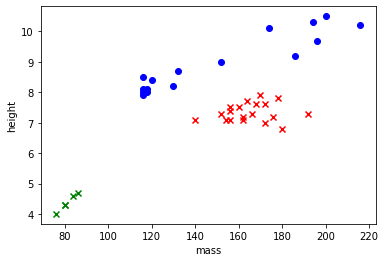

In [12]:
## Question no. 7
CSV_COLUMN_NAMES = ['fruit_name', 'mass', 'height']
FRUIT_NAME = ['lemon', 'apple', 'mandarin']
getting_file = tf.keras.utils.get_file("fruit.csv", "https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv")
reading_file = pd.read_csv(getting_file, names=CSV_COLUMN_NAMES, header=0)

IsLemon = reading_file.iloc[0: 40, 1]
IsLemon = np.where(IsLemon == 'lemon', -1, 1)

MATRIX = reading_file.iloc[0:40, [1,2]].values

plt.scatter(MATRIX[:16, 0], MATRIX[:16, 1], color='blue', marker='o', label='lemon')
plt.scatter(MATRIX[16:35, 0], MATRIX[16:35, 1], color='red', marker='x', label='apple')
plt.scatter(MATRIX[35:40, 0], MATRIX[35:40, 1], color='green', marker='x', label='mandarin')
plt.xlabel('mass')
plt.ylabel('height')


Text(0, 0.5, 'Numober of updates')

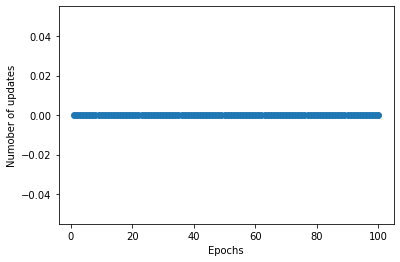

In [16]:
class Perception():
  def __init__(self, eta=0.01, n_iter=40, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.errors_ = []
  
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y) :
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return X @ self.w_

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)
  
#ok the class is done

m = IsLemon.size
vector_ones = np.ones(m).reshape(m, 1)
MATRIX1 = np.hstack([vector_ones, MATRIX])
ppn = Perception(eta=0.1, n_iter=100)
ppn.fit(MATRIX, IsLemon)
plt.plot(range(1, ppn.n_iter + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Numober of updates')



In [17]:
X_train, X_test, y_train, y_test = train_test_split(MATRIX, IsLemon, test_size=0.2, random_state=1, stratify=IsLemon)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
ppn2 = Perception(n_iter=40, eta=0.1, random_state=1)
ppn2.fit(X_train_std, y_train)

y_pred = ppn2.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 7


In [22]:
## no. 8

## listed for the five methods- SVM, Random Forest, K-nearest, SVM kernal method, SCalingmethod-


['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
284
142


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


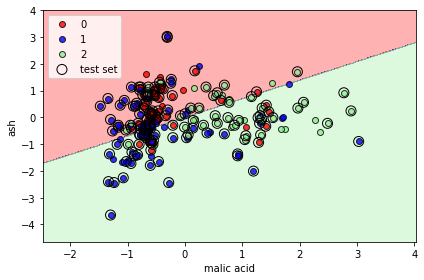

In [30]:
from sklearn.datasets import load_wine
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

df = datasets.load_wine()

x = df.data[:, [1,2]]
y = df.target
df1 = pd.DataFrame(data=df.data[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]], columns=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids','nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'])

print(df.target_names)
print(df.feature_names)
# Make a train/test split using 20% test size

##test size at 20% doesn't equate to a whole number, 178*.2=35.6, switched to 50%
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
sc1 = StandardScaler()
sc1.fit(X_train1)
X_train_std1 = sc1.transform(X_train1)
X_test_std1 = sc1.transform(X_test1)

ppn1 = Perception(n_iter=40, eta=0.1, random_state=1)
ppn1.fit(X_train_std, y_train)

##Decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
 # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
 # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    print(X_test.size)
    print(y_test.size)

    plt.scatter(X_test[:, 0],
                X_test[:, 1],
                c='',
                edgecolor='black',
                alpha=1.0,
                linewidth=1,
                marker='o',
                s=100,
                label='test set')
    
X_combined_std = np.vstack((X_train_std1, X_test_std1))
y_combined = np.hstack((y_train1, y_test1))
plot_decision_regions(X=X_combined_std, y=y_combined,
 classifier=ppn1, test_idx=range(36, 178))
##Sorry i ran into a few bugs configuring these numbers 
plt.xlabel('malic acid')
plt.ylabel('ash')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()





284
142


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


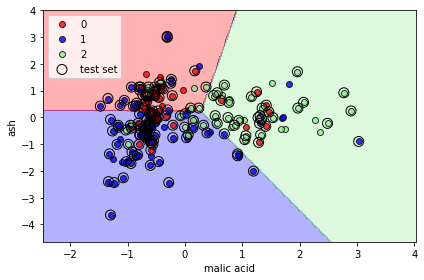

misclassified samples: 18


In [34]:
##Logic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1, solver='liblinear', multi_class='auto')
lr.fit(X_train_std1, y_train1)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(36, 178))
plt.xlabel('malic acid')
plt.ylabel('ash')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
y_pred1 = lr.predict(X_test_std1)

print('misclassified samples: %d' % (y_test1 != y_pred1).sum())

In [ ]:
#SVM Model
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std1, y_train1)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(36,178))
plt.xlabel('malic acid')
plt.ylabel('ash')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
y_pred_svm = svm.predict(X_test_std1)

print('misclassified samples: %d' % (y_test1 != y_pred_svm).sum())

In [ ]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth = 4,
                              random_state=1)
tree.fit(X_train1, y_train1)
X_combined = np.vstack((X_train1, X_test1))
Y_combined = np.hstack((y_train1, y_test1))
plot_decision_regions(X_combined, Y_combined, classifier=tree, test_idx=range(36,178))
plt.xlabel('malic acid')
plt.ylabel('ash')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
y_pred_tree = tree.predict(X_test_std1)

print('misclassified samples: %d' % (y_test1 != y_pred_tree).sum())


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=1)
forest.fit(X_train1, y_train1)
##I used the default values and still get index out of bounds-
plot_decision_regions(X_combined, Y_combined, classifier=forest, test_idx=(36,178))
plt.xlabel('malic acid')
plt.ylabel('ash')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
y_pred_forest = forest.predict(X_test_std1)

print('misclassified samples: %d' % (y_test1 != y_pred_forest).sum())

284
142


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


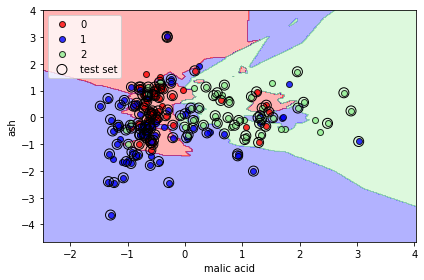

misclassified samples: 10


In [53]:
#K-nieghbors Model
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=4,
                                 p=2,
                                 metric='minkowski')
neighbors.fit(X_train_std1, y_train1)
plot_decision_regions(X_combined_std, Y_combined, classifier=neighbors, test_idx=range(36,178))
plt.xlabel('malic acid')
plt.ylabel('ash')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
y_pred_nieghbors = neighbors.predict(X_test_std1)

print('misclassified samples: %d' % (y_test1 != y_pred_nieghbors).sum())